# Nursena Karakaş-CS240-Project1

In [1]:
from __future__ import print_function

import numpy as np
import pandas as pd

import thinkplot
import thinkstats2

%matplotlib inline

# PART 2: Data Reading and selected variables

In [2]:
df = pd.read_csv('basketball_teams.csv') #read database
w = df.won #wins
homewon = df.homeWon 

# PART 3: Descriptive Statistics,Histogram, PMF, CDF

In [3]:
min(w), max(w), min(homewon), max(homewon)

(0L, 72L, 0L, 40L)

In [4]:
w = df.won #wins
homewon = df.homeWon 

print ('Mean of W: ' + str(w.mean()))
print ('Variance of W: ' + str(w.var()))
print ('Standard Deviation of W: ' + str(w.std()))
print ()
print ('Mean of Homewon: ' + str(homewon.mean()) )
print ('Variance of Homewon: ' + str(homewon.var()))
print ('Standard Deviation of Homewon:' + str(homewon.std()))

Mean of W: 37.552734375
Variance of W: 200.68777102
Standard Deviation of W: 14.1664311321

Mean of Homewon: 21.361328125
Variance of Homewon: 96.950138691
Standard Deviation of Homewon:9.84632615197


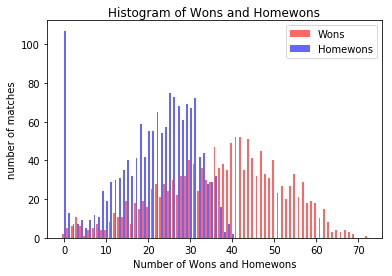

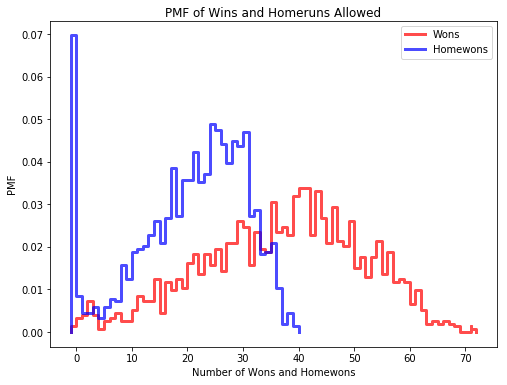

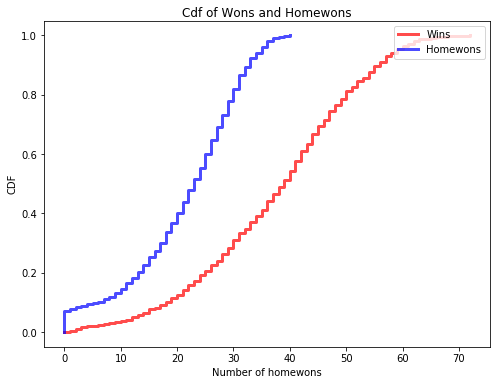

In [5]:
histogram_of_wons =thinkstats2.Hist(w,label="Wons")
histogram_of_homewons = thinkstats2.Hist(homewon,label="Homewons")
thinkplot.Hist(histogram_of_wons, color="Red",  width=0.45,align="right")
thinkplot.Hist(histogram_of_homewons, color="Blue",  width=0.45, align="left") 
thinkplot.Show(xlabel="Number of Wons and Homewons", ylabel="number of matches" , loc="upper right",title="Histogram of Wons and Homewons")

histogram_wons_pmf = thinkstats2.Pmf(w,label="Wons")
histogram_homewons_pmf = thinkstats2.Pmf(homewon,label="Homewons")
thinkplot.PrePlot(2)
thinkplot.Pmf(histogram_wons_pmf, color="Red", align="right")
thinkplot.Pmf(histogram_homewons_pmf, color="Blue", align="right") 
thinkplot.Show(xlabel="Number of Wons and Homewons", ylabel="PMF",loc="upper right",title="PMF of Wins and Homeruns Allowed")

histogram_wons_cdf= thinkstats2.Cdf(w)
histogram_homewons_cdf = thinkstats2.Cdf(homewon)
thinkplot.Cdf(histogram_wons_cdf, color="Red",label="Wins")
thinkplot.Cdf(histogram_homewons_cdf, color="Blue",label="Homewons") 
thinkplot.Show(xlabel="Number of homewons", ylabel="CDF",loc="upper right",title="Cdf of Wons and Homewons")

# PART 4: Modeling Distribution

mean: 37.552734375 std: 14.1664311321
median: 80.0520277712


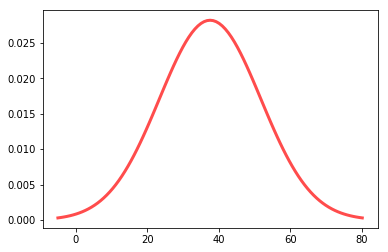

In [6]:
mean, std = w.mean(), w.std()

print ('mean: ' + str(mean) + ' std: ' + str(std))

pdf = thinkstats2.NormalPdf(mean, std)

def Median(s):
    cdf = thinkstats2.Cdf(s)
    return cdf.Value(1)

median = Median(pdf)
print ('median: ' + str(median))

thinkplot.Pdf(pdf, label='Normal Pdf Distribution of Wons', color='red')

# PART 5: Building Relationship

[[ 1.          0.73912946]
 [ 0.73912946  1.        ]]


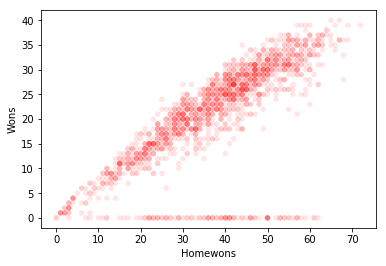

In [7]:
print (np.corrcoef(w,homewon))
thinkplot.Scatter(w,homewon, alpha=0.1,color='red') 
thinkplot.Config(xlabel='Homewons',
                 ylabel='Wons',                 
                 legend=False)

# PART 6: Hypothesis Testing

In [8]:
class HT(thinkstats2.HypothesisTest):
    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat
    
    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))
        
    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

dframe = w.values, homewon.values
ht = HT(dframe)
pvalue = ht.PValue()
print ('p-value: ' + str(pvalue))

p-value: 0.0
